In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
def str_to_bool(s):
    if s == 'True':
         return True
    elif s == 'False':
         return False
    else:
         print("Incorrect boolean value")

In [4]:
def ConfigSectionMap(section):
    #print(section)
    dict1 = {}
    options = config.options(section)
    #print(options)
    for option in options:
        try:
            dict1[option] = config.get(section, option)
            if dict1[option] == -1:
                DebugPrint("skip: %s" % option)
        except:
            print("exception on %s!" % option)
            dict1[option] = None
    return dict1

import configparser
config = configparser.ConfigParser()
config.read('CNNConfig.INI')
print(config.sections())
try:
    count1_1 = int(ConfigSectionMap("Layer1")['count1'])
    filter1_1 = int(ConfigSectionMap("Layer1")['filter1'])
    count1_2 = int(ConfigSectionMap("Layer1")['count2'])
    filter1_2 = int(ConfigSectionMap("Layer1")['filter2'])
    max_pool_size1 = int(ConfigSectionMap("Layer1")['max_pool_size'])
    dropout1 = float(ConfigSectionMap("Layer1")['dropout'])
    print("Layer 1 parameters :")
    print("Count 1 :", count1_1)
    print("Filter 1 :", filter1_1)
    print("Count 2 :", count1_2)
    print("Filter 2 :", filter1_2)
    print("Max Pool Size :", max_pool_size1)
    print("Dropout :", dropout1)
    print()
    
    count2_1 = int(ConfigSectionMap("Layer2")['count1'])
    filter2_1 = int(ConfigSectionMap("Layer2")['filter1'])
    count2_2 = int(ConfigSectionMap("Layer2")['count2'])
    filter2_2 = int(ConfigSectionMap("Layer2")['filter2'])
    max_pool_size2 = int(ConfigSectionMap("Layer2")['max_pool_size'])
    dropout2 = float(ConfigSectionMap("Layer2")['dropout'])
    print("Layer 2 parameters :")
    print("Count 1 :" ,count2_1)
    print("Filter 1 :" ,filter2_1)
    print("Count 2 :", count2_2)
    print("Filter 2 :" ,filter2_2)
    print("Max Pool Size :", max_pool_size2)
    print("Dropout :" ,dropout2)
    print()
    
    count3_1 = int(ConfigSectionMap("Layer3")['count1'])
    dropout3 = float(ConfigSectionMap("Layer3")['dropout'])
    print("Layer 3 parameters :")
    print("Count 1 :" ,count3_1)
    print("Dropout :" ,dropout3)
    print()
    
    epochs = int(ConfigSectionMap("Others")['epoch'])
    data_augmentation = str_to_bool(ConfigSectionMap("Others")['data_augmentation'])
    learning_rate = float(ConfigSectionMap("Others")['learning_rate'])
    decay = float(ConfigSectionMap("Others")['decay'])
    loss = ConfigSectionMap("Compile")['loss']
    metrics = ConfigSectionMap("Compile")['metrics']
    batch_size = int(ConfigSectionMap("Others")['batch_size'])
    workers = int(ConfigSectionMap("Others")['workers'])
    num_classes = int(ConfigSectionMap("Others")['num_classes'])
    print("Other parameters :")
    print(ConfigSectionMap("Others"))
    print("loss :", loss)
    print("metrics :", metrics)
    print("batch_size :", batch_size)
    print("epochs :" ,epochs)
    print("data_aug :", data_augmentation)
    print("decay :", decay)
    print("workers :",workers)
    print("num_classes :",num_classes)
    print()
    
    print("All parameters loaded from config file")
except:
    print("Incorrect parameters")

['Layer1', 'Layer2', 'Layer3', 'Compile', 'Others']
Layer 1 parameters :
Count 1 : 32
Filter 1 : 3
Count 2 : 32
Filter 2 : 3
Max Pool Size : 2
Dropout : 0.25

Layer 2 parameters :
Count 1 : 64
Filter 1 : 3
Count 2 : 64
Filter 2 : 3
Max Pool Size : 2
Dropout : 0.25

Layer 3 parameters :
Count 1 : 512
Dropout : 0.5

Other parameters :
{'epoch': '100', 'batch_size': '32', 'data_augmentation': 'True', 'learning_rate': '0.0001', 'decay': '1e-6', 'workers': '4', 'num_classes': '10'}
loss : categorical_crossentropy
metrics : accuracy
batch_size : 32
epochs : 100
data_aug : True
decay : 1e-06
workers : 4
num_classes : 10

All parameters loaded from config file


In [5]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
model = Sequential()
model.add(Conv2D(count1_1, (filter1_1, filter1_1), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(count1_2, (filter1_2, filter1_2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(max_pool_size1, max_pool_size1)))
model.add(Dropout(dropout1))

model.add(Conv2D(count2_1, (filter2_1, filter2_1), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(count2_2, (filter2_2, filter2_2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(max_pool_size2, max_pool_size2)))
model.add(Dropout(dropout2))

model.add(Flatten())
model.add(Dense(count3_1))
model.add(Activation('relu'))
model.add(Dropout(dropout3))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [7]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [9]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=workers)


Using real-time data augmentation.
Epoch 1/100
1563/1563 [==============================] - 27s 18ms/step - loss: 1.8690 - acc: 0.3126 - val_loss: 1.5578 - val_acc: 0.4322
Epoch 2/100
1563/1563 [==============================] - 26s 16ms/step - loss: 1.5902 - acc: 0.4176 - val_loss: 1.3861 - val_acc: 0.5005
Epoch 3/100
1563/1563 [==============================] - 25s 16ms/step - loss: 1.4596 - acc: 0.4702 - val_loss: 1.2760 - val_acc: 0.5442
Epoch 4/100
1563/1563 [==============================] - 26s 17ms/step - loss: 1.3774 - acc: 0.5022 - val_loss: 1.1977 - val_acc: 0.5763
Epoch 5/100
1563/1563 [==============================] - 25s 16ms/step - loss: 1.3022 - acc: 0.5344 - val_loss: 1.1712 - val_acc: 0.5818
Epoch 6/100
1563/1563 [==============================] - 25s 16ms/step - loss: 1.2467 - acc: 0.5565 - val_loss: 1.1273 - val_acc: 0.6068
Epoch 7/100
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1920 - acc: 0.5773 - val_loss: 1.0231 - val_acc: 0.6418
Epoch 

1563/1563 [==============================] - 25s 16ms/step - loss: 0.7620 - acc: 0.7445 - val_loss: 0.6768 - val_acc: 0.7833
Epoch 61/100
1563/1563 [==============================] - 26s 16ms/step - loss: 0.7588 - acc: 0.7454 - val_loss: 0.6190 - val_acc: 0.7917
Epoch 62/100
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7600 - acc: 0.7463 - val_loss: 0.6172 - val_acc: 0.7875
Epoch 63/100
1563/1563 [==============================] - 26s 16ms/step - loss: 0.7559 - acc: 0.7459 - val_loss: 0.6430 - val_acc: 0.7930
Epoch 64/100
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7526 - acc: 0.7465 - val_loss: 0.6849 - val_acc: 0.7729
Epoch 65/100
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7564 - acc: 0.7455 - val_loss: 0.6961 - val_acc: 0.7809
Epoch 66/100
1563/1563 [==============================] - 26s 16ms/step - loss: 0.7591 - acc: 0.7450 - val_loss: 0.6223 - val_acc: 0.7926
Epoch 67/100
1563/1563 [=======================

In [10]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 121us/step
Test loss: 0.6759564414978028
Test accuracy: 0.7805


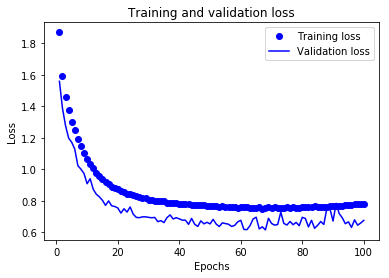

In [13]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

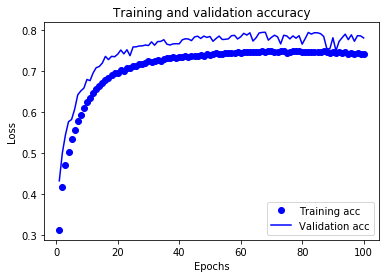

In [12]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()